### 1. About Dataset
This dataset contains various attributes of songs, such as their audio features, popularity, artist, album, release date, and more.  It allows for in-depth analysis and offers valuable insights into music trends.
#### Features
- **genre**: the actual genre of each track
- **artist_name**: Artist(s) responsible for creating the track
- **track_name**: actual name of the track
- **track_id**: the actual id of the track
- **popularity**: represent the popularity of the track
- **acousticness**: An acoustic confidence measure of each track ranging from 0.0 to 1.0 is provided for the track. 1.0 signifies a significant level.
- **danceability**: the track's suitability for dancing, which is determined by analyzing various musical elements (0.0 to 1.0)
- **duration_ms**: the actual duration of the track in miliseconds
- **energy**: the intensity and activity level of a track (0.0 to 1.0), with higher values indicating tracks that are more energetic.
- **instrumentalness**: the probability of a track being instrumental
- **key**: indicates the key in which the track is played. It's a numerical value that falls within a range of 0 to 11, representing different musical keys.
- **liveness**: Determines the existence of an engaged crowd during the recording. The value ranges from 0.0 to 1.0, where higher values suggest a greater likelihood of the track being performed live. 
- **loudness**: the perceived volume or intensity of a track
- **mode**: the actual mode of each track ( major, minor)
- **speechiness**: It identifies the occurrence of spoken words in a track. The attribute value is closer to 1.0 when the recording is more speech-like, such as in a talk show, audio book, or poetry. Values exceeding 0.66 indicate tracks that likely consist predominantly of spoken words. Values ranging from 0.33 to 0.66 indicate tracks that potentially have a combination of music and speech, such as rap music, either in sections or layered. Values that fall below 0.33 are typically indicative of music and other tracks that do not resemble speech.
- **tempo**: the speed or pace at which the track is played or performed (per minute).
- **time_signature**: The time-signature of a particular track, which determines the number of beats in each measure and the type of note that receives one beat.
- **variance**: The uplifting nature of the song's musical content





### 2. Exploratory Data Analysis
Exploring the dataset is an essential step in the early stages of a data analysis project. It allows for a thorough understanding of the data, identification of any potential problems, and discovery of meaningful patterns. In this section, we will thoroughly examine the dataset to establish a solid foundation for future modeling and analysis.

In [164]:
# import libraries for data processing
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### a/ Data Loading and Inspection:
    

- The dataset SpotifyFeatures.cvs will be loaded into a Pandas DataFrame

In [165]:
# Load the 'SpotifyFeatures.csv' dataset into a Pandas DataFrame
data = pd.read_csv('SpotifyFeatures.csv')



- Upon first examination, the dataset's dimensions, including the number of rows and columns, can be determined.

In [166]:
# Display the number of rows and columns in the dataset
print(data.shape)

(232725, 18)


- The first few rows will be displayed to get a glimpse of the data's structure and content.

In [167]:
# Display the first 5 rows of the dataset
# This is useful to understand the data's structure, column names, and sample values
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [168]:
# drop column track_id because our model does not need this information
data = data.drop(columns=['track_id'])

#### b/ Data Cleaning and Preprocessing

- **Handling Missing Values**: A thorough assessment of missing values will be conducted. If necessary, appropriate imputation or removal strategies will be applied.

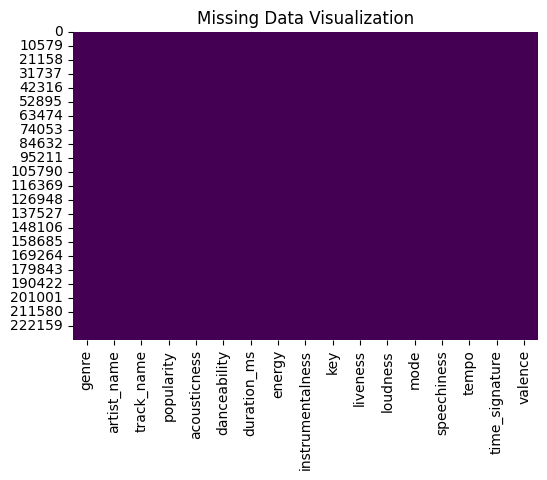

Missing Data Counts:
 genre               0
artist_name         0
track_name          1
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [169]:
# Identify missing data
missing_data = data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Print missing data counts
print("Missing Data Counts:\n", missing_data)

Obviously, there is a missing values in this dataset, which is track_name. Therefore, we need to handle this missing values by remove it from dataset.

- **Handeling missing values**

In [170]:
# Dropping null values from multiple columns ('tempo' and 'other_column')
data = data.dropna(subset=['track_name'])

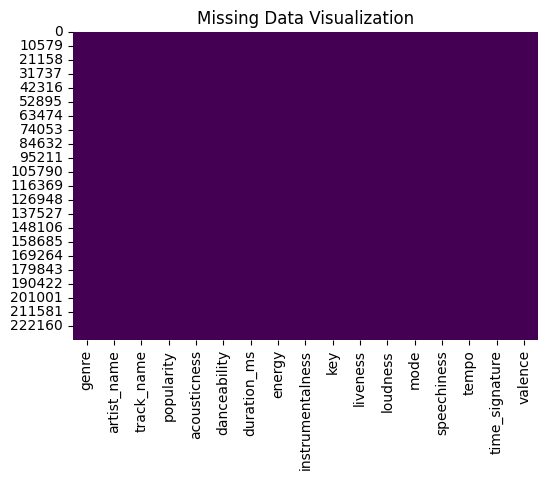

Missing Data Counts:
 genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [171]:
# Identify missing data
missing_data = data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Print missing data counts
print("Missing Data Counts:\n", missing_data)

- **Identifying and Addressing Duplicates**:
Duplicate rows will be detected and removed to ensure data integrity.

In [172]:
# Identify duplicate data
duplicate_rows = data[data.duplicated()]

# Display duplicate rows if they exist
if not duplicate_rows.empty:
    print("\nDuplicated Rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicated rows found.")

# Print the count of duplicate rows
print(f"\nNumber of Duplicated Rows: {len(duplicate_rows)}")


No duplicated rows found.

Number of Duplicated Rows: 0


There is no duplicated rows, so we do not need to drop any rows.

#### Data Information

In [173]:
# the information of first ten columns
data[data.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   popularity        232724 non-null  int64  
 4   acousticness      232724 non-null  float64
 5   danceability      232724 non-null  float64
 6   duration_ms       232724 non-null  int64  
 7   energy            232724 non-null  float64
 8   instrumentalness  232724 non-null  float64
 9   key               232724 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 19.5+ MB


In [174]:
# The information of remaining columns
data[data.columns[10:]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   liveness        232724 non-null  float64
 1   loudness        232724 non-null  float64
 2   mode            232724 non-null  object 
 3   speechiness     232724 non-null  float64
 4   tempo           232724 non-null  float64
 5   time_signature  232724 non-null  object 
 6   valence         232724 non-null  float64
dtypes: float64(5), object(2)
memory usage: 14.2+ MB


In [175]:
numerical_columns = data.select_dtypes(include=['number']).columns
num_numerical_columns = len(numerical_columns)

print(f"Number of columns with numerical values: {num_numerical_columns}")

Number of columns with numerical values: 11


In [176]:
integer_columns = [col for col in data.columns if pd.api.types.is_integer_dtype(data[col])]
num_integer_columns = len(integer_columns)

print(f'Number of columns with integer values: {num_integer_columns}')

Number of columns with integer values: 2


### Column and Dtype Logic
This dataset contains both numeric and categorical data types:

- **Numeric Columns**: These columns are used for quantitative measurements and include both integers (int64) and floating-point numbers (float64). These floating-point columns typically represent various audio characteristics of tracks, while the integer columns represent the popularity and the duration of tracks in milliseconds.
- **Categorical Columns**: These columns contain qualitative data (object) and are used to represent categories such as key, mode, and so on.

Numeric and Category Columns
- **Numeric Columns**: 11 (9 floating point + 2 integers)
    - **Integers (int64)**: There are 2 columns containing integer data, which includes measurements like popularity and duration_ms
    - **Floating-point**: There are 9 columns containing floating-point data, such as speechiness, tempo and so on.

- **Categorical Columns**: 6 
    - There are 6 columns containing categorical data (object), representing categories such as genre, artist_name, track_name, key, mode, time_signature
    
The dataset provides a comprehensive overview of various factors that might influence the popularity level of a track, combining both quantitative and qualitative aspects. 

#### General Evaluation for Numeric Values 

In [177]:
# Select numeric data
numeric_data = data.select_dtypes(include='number').columns
print("numeric_data", numeric_data)


numeric_data Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')


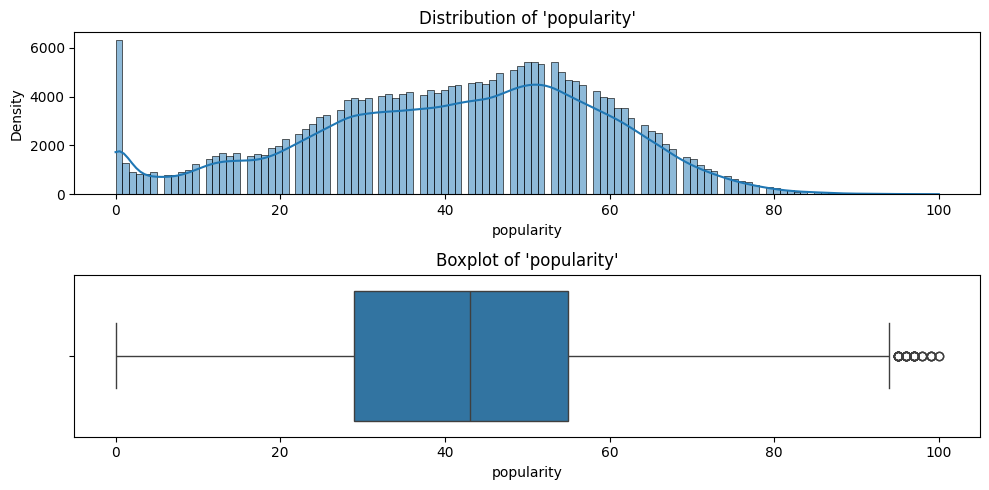

**Detailed Analysis for 'popularity'**
There is a noticeable spike in the 0-10 range, indicating that a large number of tracks have extremely low popularity
There is a gradual and widespread increase from 20 to 60, suggesting a moderate level of popularity for many tracks
Another notable peak is observed around 50-60, indicating a significant number of tracks with moderate popularity.
The extended tail reaching towards 100 suggests a decrease in the number of tracks that have gained significant popularity
There are some tracks that stand out at the higher end, suggesting they have exceptionally high popularity.


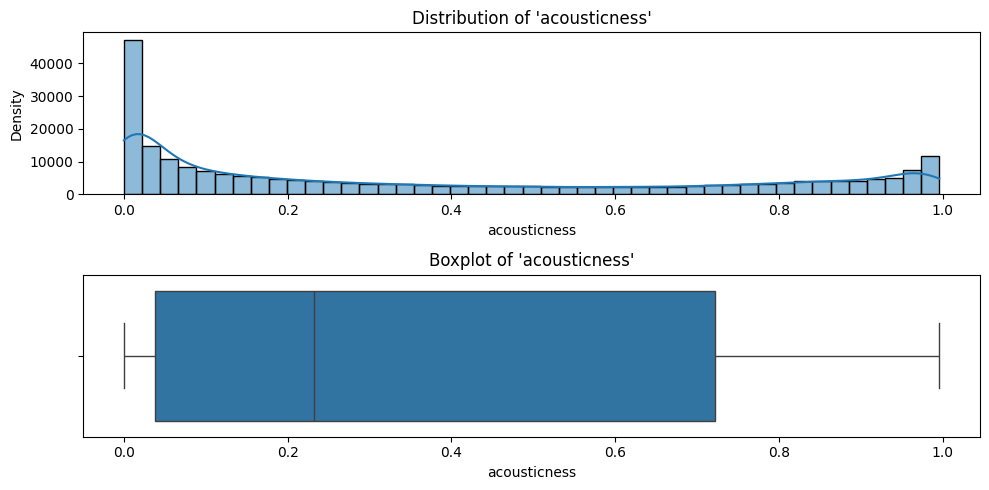

**Detailed Analysis for 'acousticness'**
The distribution of acoustiness is left-skewed, which indicates that most tracks have low acousticness.
The interquartile range (IQR) covers a range of approximately 0.0 to 0.4, suggesting that the middle 50% of the dataset is contained within this interval.
All values in this plot fall within the whiskers, indicating that there are no significant outliers.


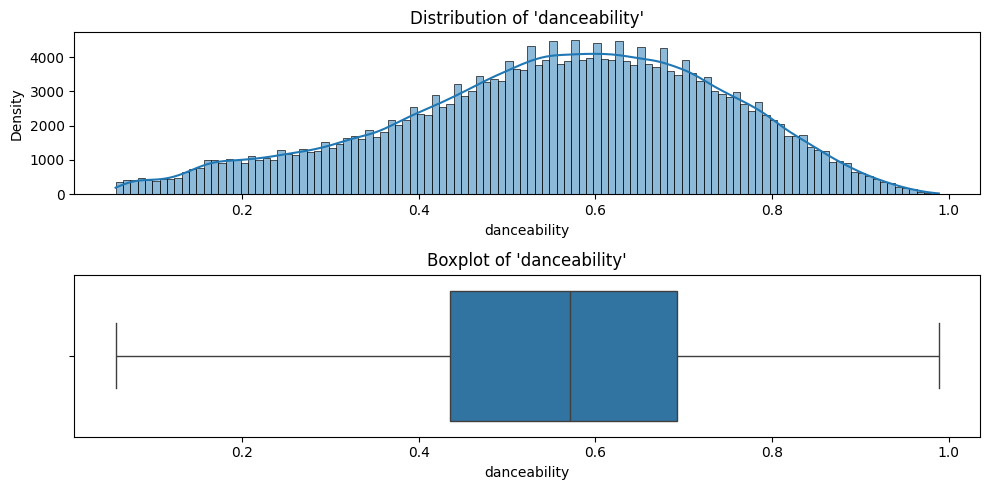

**Detailed Analysis for 'danceability'**
The distribution of danceability has a normal-like distribution, which centered around the middle range
There is a noticeable concentration of values around 0.6, suggesting that a significant number of tracks have a danceability score ranging from moderate to high.
The density gradually rises from lower values (0.1 to 0.4) and then declines after reaching a peak around 0.6.
There are no significant outliers.


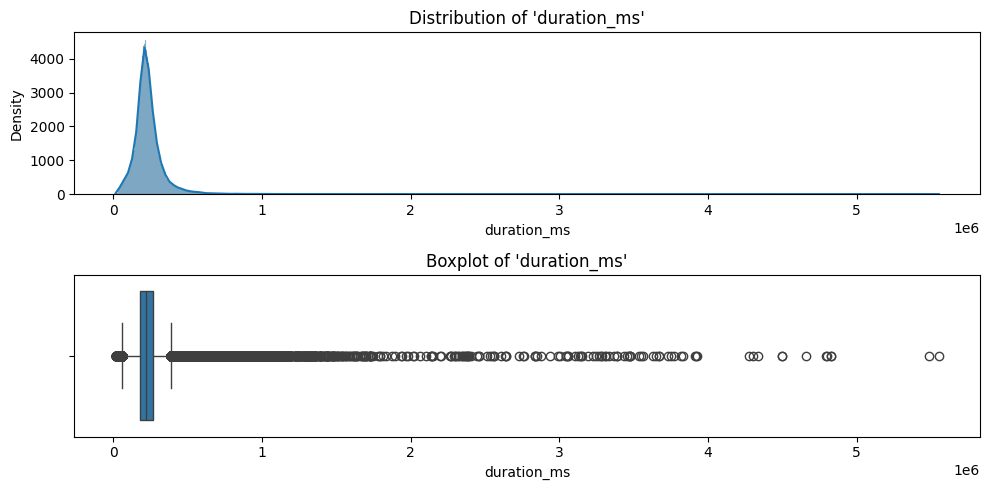

**Detailed Analysis for 'duration_ms'**
The duration_ms distribution is heavily skewed to the right, suggesting that the majority of tracks have shorter durations, while a small number of tracks have much longer durations.
The majority of tracks have short durations.
However, there are tracks with a wide range of durations (outliers with sustantially longer durations.)


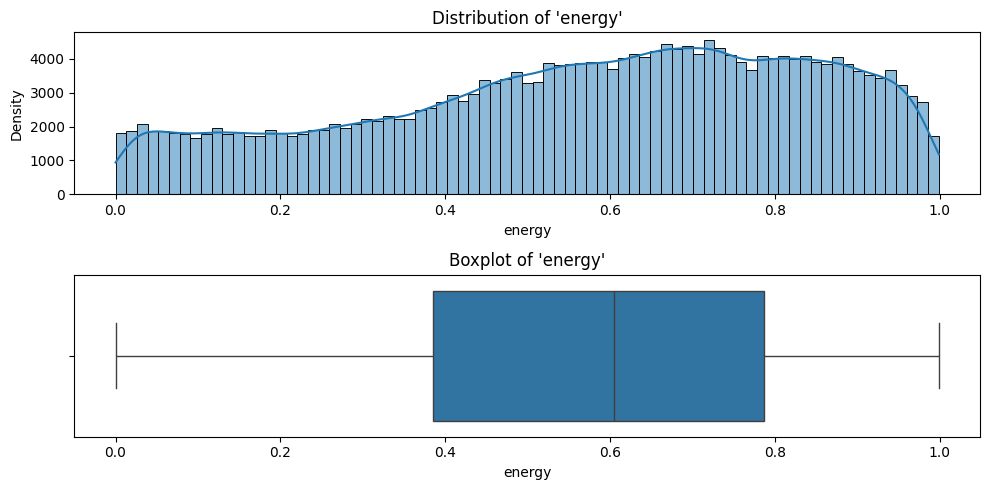

**Detailed Analysis for 'energy'**
The distribution of energy scores in the dataset appears to be fairly even, with a slight tendency towards higher energy levels.
Most tracks display moderate to high energy values, with a peak around 0.6 to 0.7, suggesting that a significant number of tracks are quite energetic.


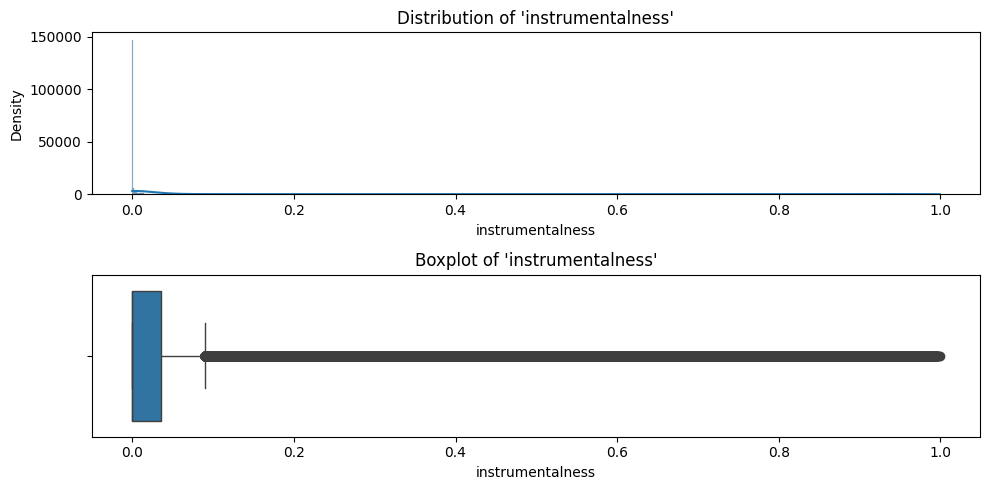

**Detailed Analysis for 'instrumentalness'**
Most tracks exhibit a significant lack of instrumentalness, as evident from the peak in the distribution plot and the clustering of values towards the lower end of the boxplot.
The range of values indicates that there are tracks with a diverse range of instrumentalness, including several outliers with notably higher values.


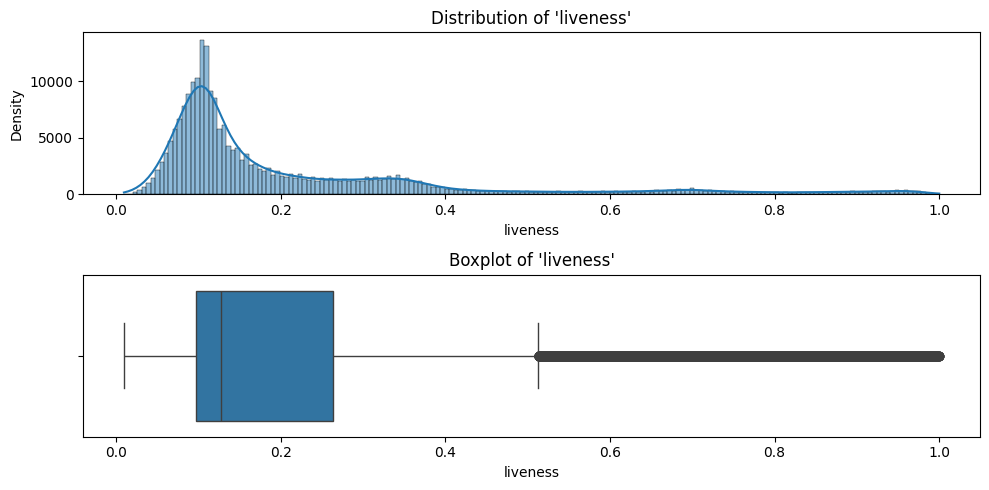

**Detailed Analysis for 'liveness'**
The distribution of liveness is right-skewed, suggesting that the majority of tracks have relatively low to moderate liveness values.
The distribution of values indicates that there are tracks exhibiting a diverse range of liveness, including several outliers with notably higher values.


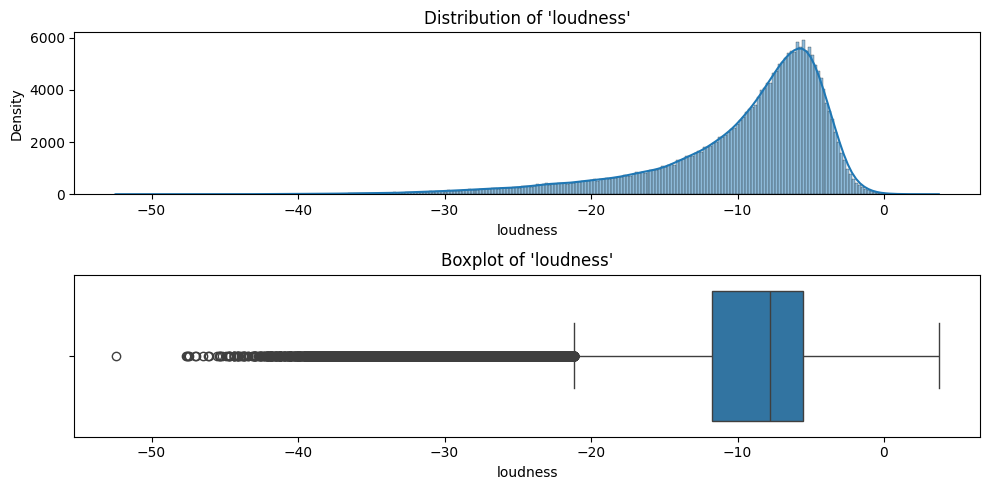

**Detailed Analysis for 'loudness'**
The left-skewed distribution suggests that while most tracks are relatively loud, there are some tracks with very low loudness, creating a long tail in the distribution plot.
There are a significant number of outliers


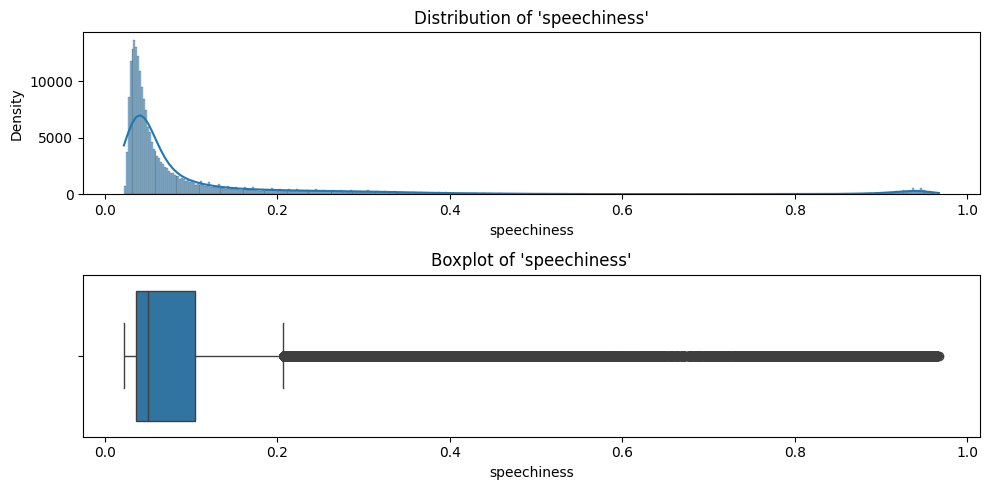

**Detailed Analysis for 'speechiness'**
Although the majority of the songs are not highly speechy, the right-skewed distribution indicates that there are some tracks that are extremely speechy, which adds length to the distribution plot's tail.
There are a significant number of outliers 


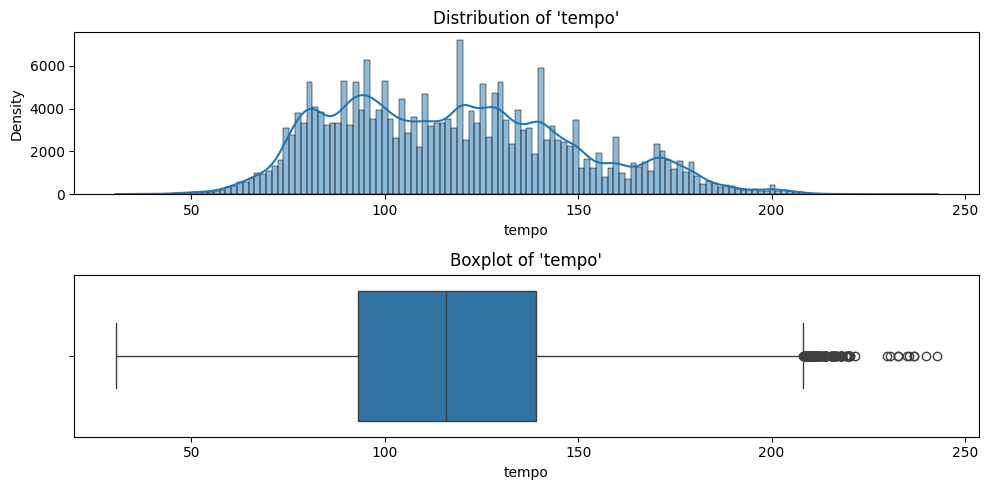

**Detailed Analysis for 'tempo'**
Most tracks fall within the tempo range of 95 to 130 BPM, with notable spikes at around 100 and 120 BPM. This suggests that a large number of tracks have a moderate to fast tempo.
There are a number of outliers which are tracks that has very fast speed


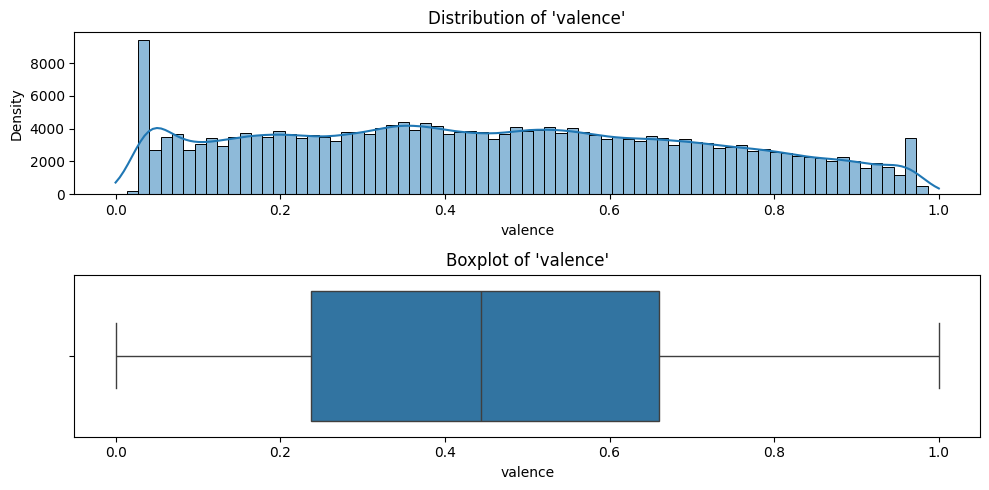

**Detailed Analysis for 'valence'**
The valence values cover the entire range from 0 to 1, suggesting a diverse range of emotional tones in the tracks.
The distribution of valence values in the tracks appears to be fairly even, indicating a balanced spread. However, there is a slight tendency towards lower values.
Based on the data, it seems that there are not many extreme valence values, which is quite normal.


In [178]:
for col in numeric_data:
    i= 0
    fig, axes = plt.subplots(2, 1, figsize=(10, 5))  # 2 rows, 1 column

    # Distribution Plot (Top Subplot)
    sns.histplot(data=data, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of '{col}'")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")

    # Box Plot (Bottom Subplot)
    sns.boxplot(data=data, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot of '{col}'")
    axes[1].set_xlabel(col)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    if col == 'popularity':
        print(f"**Detailed Analysis for '{col}'**")
        print("There is a noticeable spike in the 0-10 range, indicating that a large number of tracks have extremely low popularity\nThere is a gradual and widespread increase from 20 to 60, suggesting a moderate level of popularity for many tracks\nAnother notable peak is observed around 50-60, indicating a significant number of tracks with moderate popularity.\nThe extended tail reaching towards 100 suggests a decrease in the number of tracks that have gained significant popularity\nThere are some tracks that stand out at the higher end, suggesting they have exceptionally high popularity.")
        
    elif col == 'acousticness':
        print(f"**Detailed Analysis for '{col}'**")
        print('The distribution of acoustiness is left-skewed, which indicates that most tracks have low acousticness.\nThe interquartile range (IQR) covers a range of approximately 0.0 to 0.4, suggesting that the middle 50% of the dataset is contained within this interval.\nAll values in this plot fall within the whiskers, indicating that there are no significant outliers.')
        
    elif col == 'danceability':
        print(f"**Detailed Analysis for '{col}'**")
        print("The distribution of danceability has a normal-like distribution, which centered around the middle range\nThere is a noticeable concentration of values around 0.6, suggesting that a significant number of tracks have a danceability score ranging from moderate to high.\nThe density gradually rises from lower values (0.1 to 0.4) and then declines after reaching a peak around 0.6.\nThere are no significant outliers.")
        
    elif col == 'duration_ms':
        print(f"**Detailed Analysis for '{col}'**")
        print("The duration_ms distribution is heavily skewed to the right, suggesting that the majority of tracks have shorter durations, while a small number of tracks have much longer durations.\nThe majority of tracks have short durations.\nHowever, there are tracks with a wide range of durations (outliers with sustantially longer durations.)")
    
    elif col == 'energy':
        print(f"**Detailed Analysis for '{col}'**")
        print("The distribution of energy scores in the dataset appears to be fairly even, with a slight tendency towards higher energy levels.\nMost tracks display moderate to high energy values, with a peak around 0.6 to 0.7, suggesting that a significant number of tracks are quite energetic.")
    
    elif col == 'instrumentalness':
        print(f"**Detailed Analysis for '{col}'**")
        print("Most tracks exhibit a significant lack of instrumentalness, as evident from the peak in the distribution plot and the clustering of values towards the lower end of the boxplot.\nThe range of values indicates that there are tracks with a diverse range of instrumentalness, including several outliers with notably higher values.")
    
    elif col == 'liveness':
        print(f"**Detailed Analysis for '{col}'**")
        print("The distribution of liveness is right-skewed, suggesting that the majority of tracks have relatively low to moderate liveness values.\nThe distribution of values indicates that there are tracks exhibiting a diverse range of liveness, including several outliers with notably higher values.")
    
    elif col == 'loudness':
        print(f"**Detailed Analysis for '{col}'**")
        print("The left-skewed distribution suggests that while most tracks are relatively loud, there are some tracks with very low loudness, creating a long tail in the distribution plot.\nThere are a significant number of outliers")
    
    elif col == 'speechiness':
        print(f"**Detailed Analysis for '{col}'**")
        print("Although the majority of the songs are not highly speechy, the right-skewed distribution indicates that there are some tracks that are extremely speechy, which adds length to the distribution plot's tail.\nThere are a significant number of outliers ")
    
    elif col == 'tempo':
        print(f"**Detailed Analysis for '{col}'**")
        print("Most tracks fall within the tempo range of 95 to 130 BPM, with notable spikes at around 100 and 120 BPM. This suggests that a large number of tracks have a moderate to fast tempo.\nThere are a number of outliers which are tracks that has very fast speed")
    else:
        print(f"**Detailed Analysis for '{col}'**")
        print("The valence values cover the entire range from 0 to 1, suggesting a diverse range of emotional tones in the tracks.\nThe distribution of valence values in the tracks appears to be fairly even, indicating a balanced spread. However, there is a slight tendency towards lower values.\nBased on the data, it seems that there are not many extreme valence values, which is quite normal.")
         
       
        
         

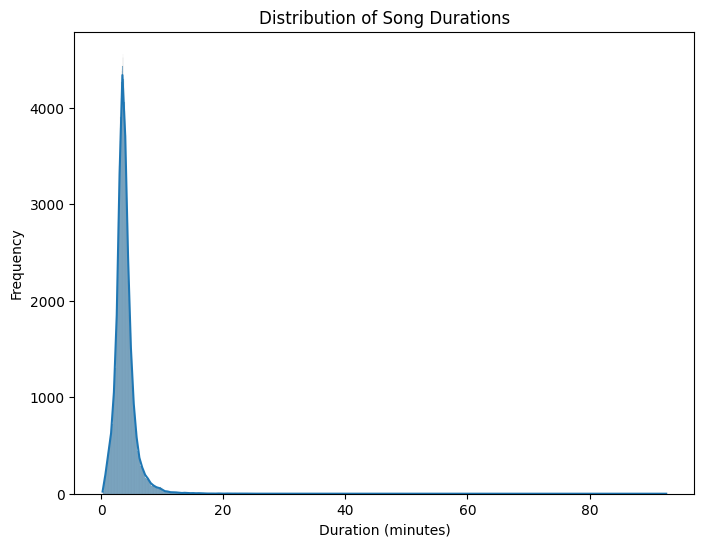

In [179]:
# the duration of track in minute
plt.figure(figsize=(8, 6))
sns.histplot(data['duration_ms'] / (1000 * 60), kde=True)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

In [180]:
from scipy.stats import skew
skewness = data.select_dtypes(include='number').apply(skew)
print(skewness)

popularity         -0.336385
acousticness        0.534232
danceability       -0.378286
duration_ms         9.893359
energy             -0.400226
instrumentalness    1.819748
liveness            2.074073
loudness           -1.662191
speechiness         3.311240
tempo               0.403355
valence             0.144129
dtype: float64


It's evident that we have some skewed features. It is worth mentioning that the 'duration_ms' feature exhibits a significant right-skewness, suggesting that there are a small number of songs with unusually long durations compared to the majority. Similarly, 'instrumentalness', 'liveness', and 'speechiness' also show a clear right-skewness pattern, indicating that there is a high concentration of low values with a long tail of higher values. We will address the skewness by transforming the features that are skewed.

#### General Evaluation For Categorical Values

In [181]:
# Select categorical data
categorical_data = data.select_dtypes(exclude='number').columns
print("categorical_data", categorical_data)

categorical_data Index(['genre', 'artist_name', 'track_name', 'key', 'mode', 'time_signature'], dtype='object')


In [182]:
for col in categorical_data:
    unique_values = data[col].unique()

    # Print unique values for the current column
    print(f"\nUnique Values in Column '{col}':")
    print(unique_values)

    # Optionally, print the value counts if needed
    # print(data[col].value_counts())


Unique Values in Column 'genre':
['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']

Unique Values in Column 'artist_name':
['Henri Salvador' 'Martin & les fées' 'Joseph Williams' ... 'Dharmasoul'
 'Swim' 'Jr Thomas & The Volcanos']

Unique Values in Column 'track_name':
["C'est beau de faire un Show" "Perdu d'avance (par Gad Elmaleh)"
 "Don't Let Me Be Lonely Tonight" ... 'P.O.P.' 'Burning Fire'
 "You Don't Have To Hurt No More"]

Unique Values in Column 'key':
['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B']

Unique Values in Column 'mode':
['Major' 'Minor']

Unique Values in Column 'time_signature':
['4/4' '5/4' '3/4' '1/4' '0/4']


- **Genre**

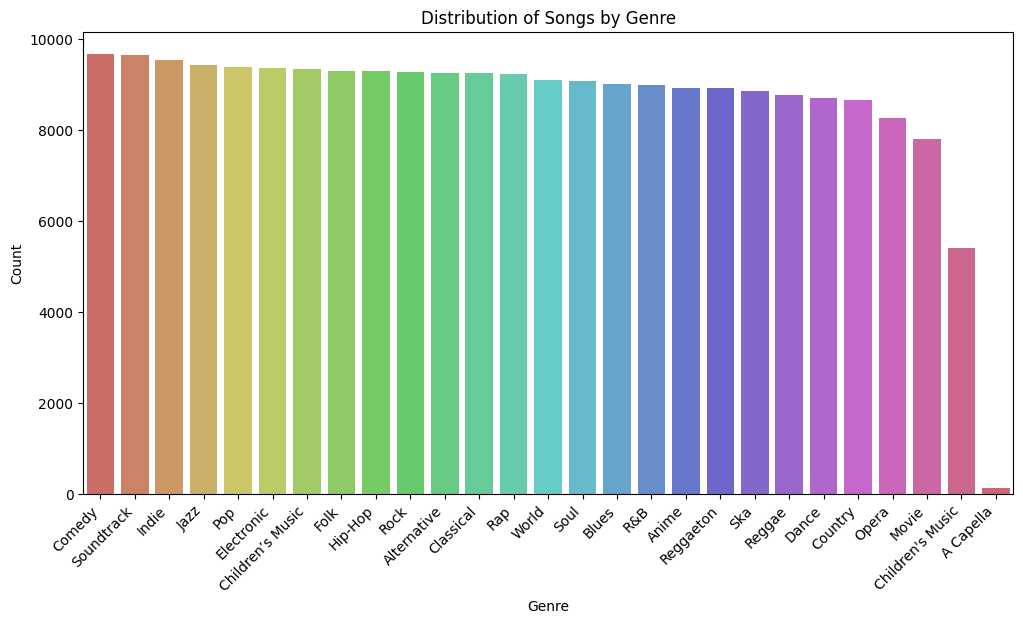

In [183]:
# Illustrating Genre
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='genre', order=data['genre'].value_counts().index, palette="hls" )
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Songs by Genre')
plt.show()

In general, Spotify provides a lot of music genres on their platforms. Moreover, Comedy, Soundtrack, Indie, Jazz, Pop, Electronic, Children's Music, Folk, Hip-Hop, Rock, and Alternative are some of the most common genres found in the dataset.

- **Artist Name**

In [184]:
# Artits name and their number of songs
artist_counts = data['artist_name'].value_counts()
print(artist_counts)

artist_name
Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: count, Length: 14564, dtype: int64


Since there is a significant number of artist in this dataset, I think it is more reasonable to just illustrate top twenty artist who has the highest number of tracks in this Spotify's dataset.

In [185]:
# Visualization of top twenty artists based on their number of tracks
top20_artist = artist_counts.head(20)
print(top20_artist)

artist_name
Giuseppe Verdi             1394
Giacomo Puccini            1137
Kimbo Children's Music      971
Nobuo Uematsu               825
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Juice Music                 684
Johann Sebastian Bach       632
Ludwig van Beethoven        596
Hans Zimmer                 559
Gioachino Rossini           491
Chorus                      480
Howard Shore                479
Drake                       477
Henri Salvador              474
John Williams               450
Frédéric Chopin             436
Alan Menken                 420
Name: count, dtype: int64


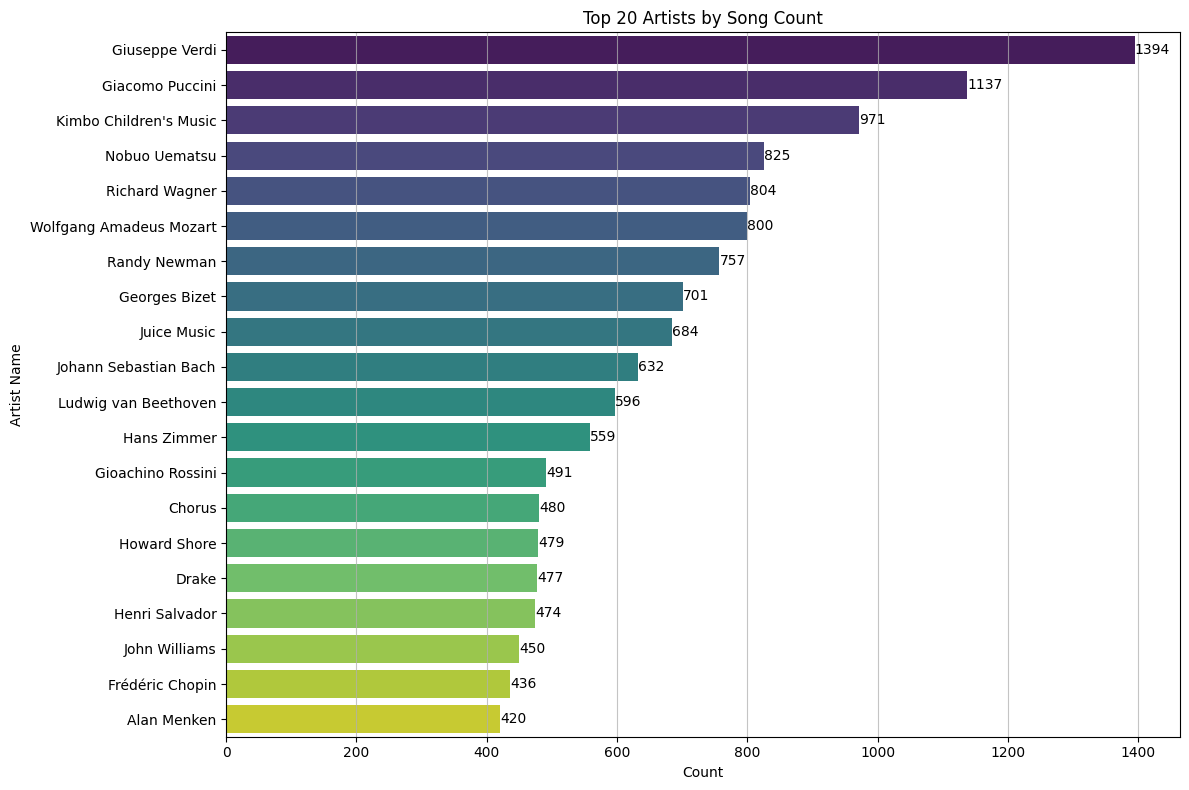

In [186]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top20_artist.values, y=top20_artist.index,palette="viridis")

# Enhance plot appearance
plt.xlabel("Count")
plt.ylabel("Artist Name")
plt.title("Top 20 Artists by Song Count")
plt.grid(axis='x', alpha=0.75)  # Add horizontal grid

# Add count annotations
for index, value in enumerate(top20_artist.values):
    ax.text(value, index, f'{value}', va='center')

# Display the plot
plt.tight_layout()
plt.show()

There is a vast number of artists who have uploaded their tracks on the Spotify platform. Furthermore, it is evident that Giuseppe Verdi made a significant contribution with a staggering 1394 tracks, surpassing the combined total of artists ranked 15 and below by threefold.

- **Names of Tracks in the Spotify Dataset**
Similar to the artist_name column, there are also an enormous unique values in such column, thus it is not efficent to visualize all the values. In this data exploration, I will only visualize top 20 tracks based on their occurences

In [187]:
track_counts = data['track_name'].value_counts()
track_counts

track_name
Home                                                           100
You                                                             71
Intro                                                           69
Stay                                                            63
Wake Up                                                         59
                                                              ... 
Siegfried / Zweiter Aufzug: Vorspiel                             1
Die Walküre / Zweiter Aufzug: "Siegmund! Sieh auf mich!"         1
Puccini: Tosca, Act 1: "Ah! Finalmente!" (Angelotti) [Live]      1
Harpsichord Sonata No. 11 in F Major: I. Moderato                1
You Don't Have To Hurt No More                                   1
Name: count, Length: 148614, dtype: int64

In [188]:
# Visualization of top 20 tracks based on their occurencies
top20_track = track_counts.head(20)
print(top20_track)

track_name
Home           100
You             71
Intro           69
Stay            63
Wake Up         59
Closer          58
Forever         57
Without You     56
Smile           55
Beautiful       50
Hold On         46
Breathe         45
Runaway         45
Run             45
Lullaby         44
Roses           43
Falling         43
Trouble         43
Believe         43
Paradise        43
Name: count, dtype: int64


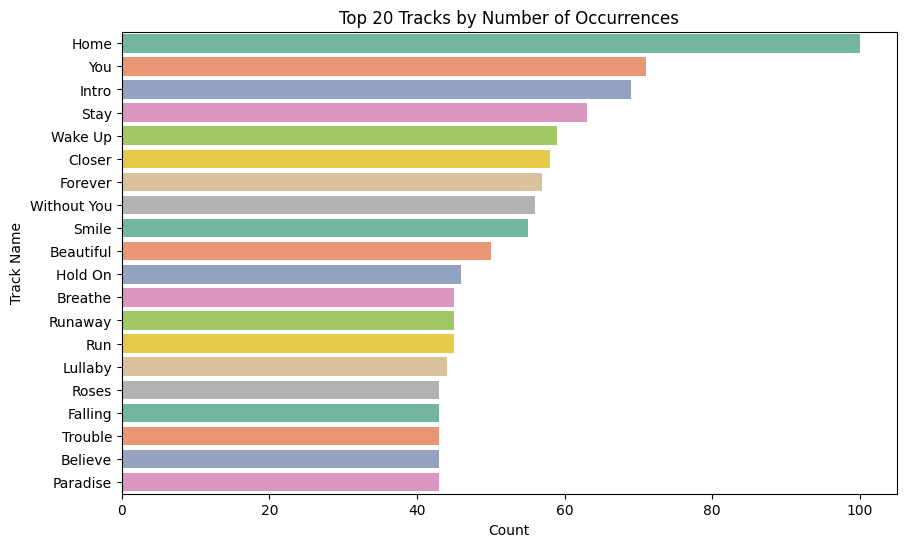

In [189]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top20_track.values, y=top20_track.index, palette='Set2')
plt.xlabel('Count')
plt.ylabel('Track Name')
plt.title('Top 20 Tracks by Number of Occurrences')
plt.show()

It is clear to see that tracks on Spotify have diversity of name. Moreover, the counts for the top 20 tracks are quite similar to each other, except for "Home," which stands out noticeably with the highest count around 100. Lastly, the visualization proved that there are tracks that were created by numerous artists.


- **Key**

In [190]:
key_counts = data['key'].value_counts()
key_counts

key
C     27583
G     26390
D     24077
C#    23201
A     22671
F     20278
B     17661
E     17390
A#    15526
F#    15222
G#    15159
D#     7566
Name: count, dtype: int64

In [191]:
# Count the number of unique values in 'key' column
num_unique_key = data['key'].nunique()

# Display the number of unique values
print(f"Number of unique artists: {num_unique_key}")

Number of unique artists: 12


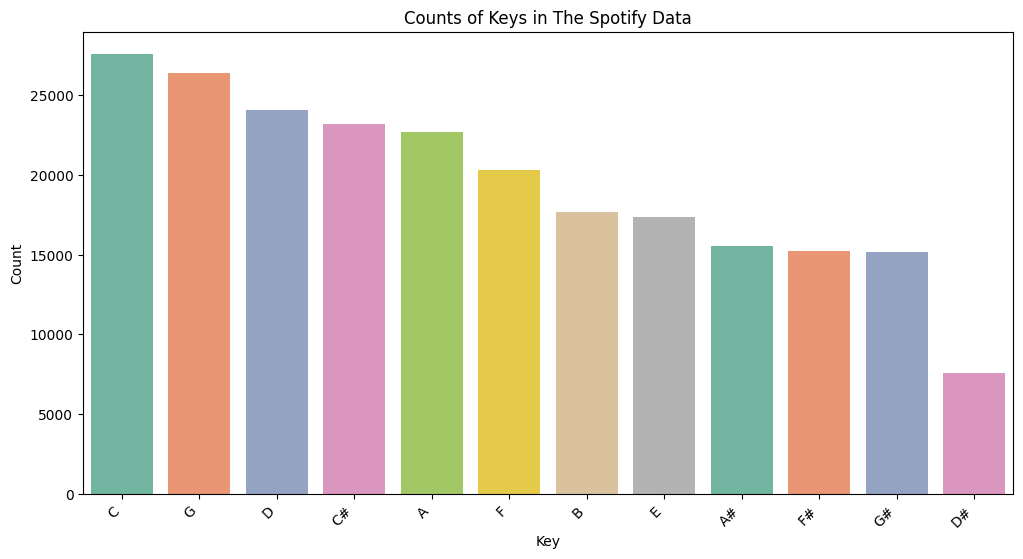

In [192]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='key', order=data['key'].value_counts().index, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Counts of Keys in The Spotify Data')
plt.show()

The key 'C' has the highest count, followed by 'G', 'D', 'C#', and so on.
The key 'D#' has the lowest count among the keys listed.

- **Mode**:
    -   There are two unique values in Mode (Major and Minor)

In [193]:
mode_counts = data['mode'].value_counts()
mode_counts

mode
Major    151743
Minor     80981
Name: count, dtype: int64

Visualization of Percentages of Each Mode's values

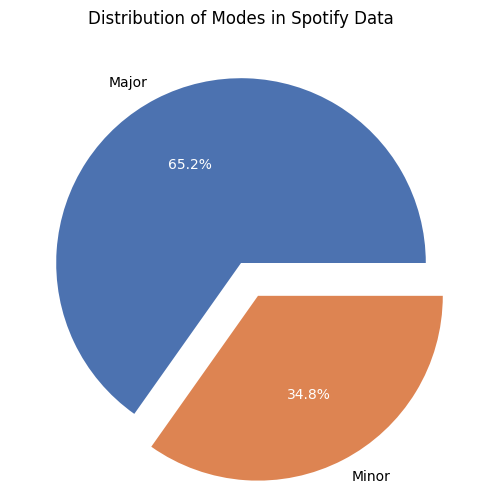

In [194]:
custom_colors = sns.color_palette("deep")

# Create the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    mode_counts, 
    labels=mode_counts.index, 
    autopct='%1.1f%%', 
    explode=[0, 0.2], 
    colors=custom_colors, 
    textprops={'color': 'black'}
)

# Change the color of the percentage text to white
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Distribution of Modes in Spotify Data')
plt.show()

Most of the tracks in the dataset are in the Major mode, accounting for 65.2% of the total. It appears that a considerable number of the songs possess a Major key signature, which is commonly linked to music that is more joyful and uplifting. The Minor mode represents approximately 34.8% of the dataset. Tracks in the Minor mode often evoke a sense of sadness or melancholy, creating a different emotional experience compared to those in the Major mode.


- **time_signature**: The time-signature of a particular track, which determines the number of beats in each measure and the type of note that receives one beat.

In [195]:
time_signature_count = data['time_signature'].value_counts()
time_signature_count

time_signature
4/4    200759
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: count, dtype: int64

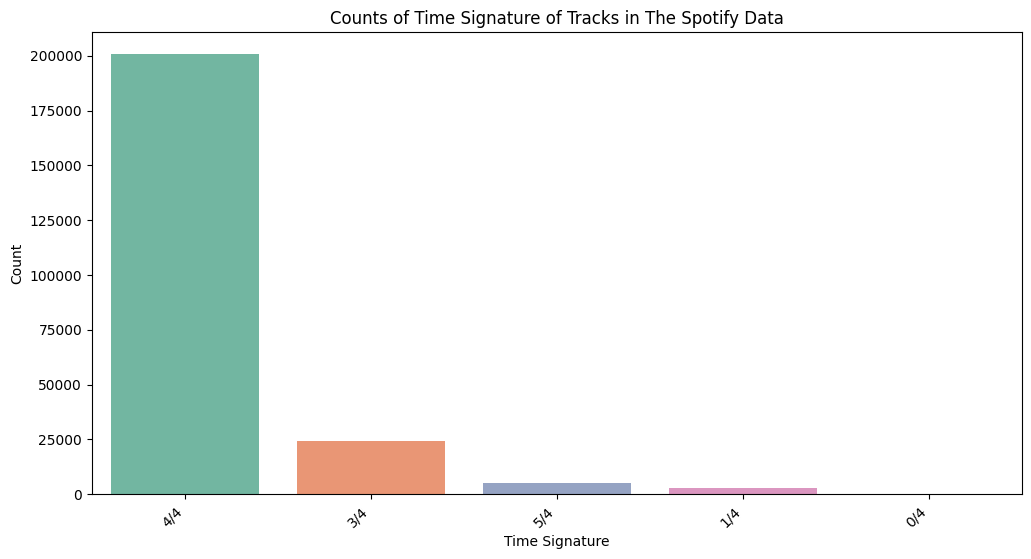

In [196]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='time_signature', order=data['time_signature'].value_counts().index, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.title('Counts of Time Signature of Tracks in The Spotify Data')
plt.show()

The 4/4 time signature is by far the most prevalent, with nearly 200,000 tracks. This time signature is frequently found in popular music, which is why it has a strong presence in the dataset. Beside, The 3/4 time signature is quite common, although it is not as popular as the 4/4 time signature. It appears in approximately 25,000 tracks. This time signature is commonly linked to waltzes and specific classical compositions.
Less commonly used time signatures include 5/4, 1/4, and 0/4. These less frequently encountered time signatures have relatively low counts, suggesting their infrequent usage in popular music.

### 3. Data Preprocessing ###

In [197]:
# Generating summary statistics of the numerical columns
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232724.000000,232724.000000,232724.000000,2.327240e+05,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000
mean,41.127490,0.368562,0.554366,2.351218e+05,0.570958,0.148302,0.215010,-9.569896,0.120765,117.666494,0.454919
std,18.189986,0.354768,0.185608,1.189359e+05,0.263456,0.302769,0.198273,5.998215,0.185519,30.898942,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828562e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.777500,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054500,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


The dataset for Spotify songs includes a range of numerical features with different scales, including 'popularity', 'duration_ms', 'loudness', and 'tempo'. The features mentioned here capture various characteristics of songs and are measured using different scales. For instance, the 'popularity' scale ranges from 0 to 100, while 'duration_ms' indicates the duration of songs in milliseconds. 'Loudness' is measured in decibels (dB), with negative values indicating softer songs and positive values indicating louder ones. Similarly, the tempo of a song represents the beats per minute (BPM), which can vary widely across different genres. Given the variations in scales, it is crucial to scale or normalize the features before utilizing classification algorithms or predictive models. This ensures that each feature has an equal contribution to the analysis and model training process.

1. Create new column "duration_seconds" to store the values of "duration_ms" in seconds instead of in milliseconds. By this way, we can scale the duration_ms smaller 1000 times while being able to minimize the loss of data.

In [198]:
data['duration_seconds'] = data['duration_ms']/1000
data['duration_seconds']

0          99.373
1         137.373
2         170.267
3         152.427
4          82.625
           ...   
232720    326.240
232721    282.447
232722    166.960
232723    222.442
232724    323.027
Name: duration_seconds, Length: 232724, dtype: float64

2.  Create new column "tempo_seconds" to store the values of "tempo" in seconds instead of in minute. By this way, we can make tempo and duration's values share a same measurement.

In [199]:
data['tempo_seconds'] = data['tempo'] /60
data['tempo_seconds']

0         2.782817
1         2.900050
2         1.658133
3         2.862633
4         2.342933
            ...   
232720    1.925700
232721    1.897167
232722    1.402250
232723    1.667183
232724    1.898283
Name: tempo_seconds, Length: 232724, dtype: float64

3. This code snippet creates bins and labels to categorize the 'popularity' column into distinct categories. A new column called 'popularity_category' is created, containing category labels determined by the specified bins. This is because the goal of the project to clasify whether a song is popular or not. Therefore, I need to interpret column 'popularity''s values into more meaningful information. The 'popularity_category' will has 4 unique values which are low, medium, high, and very high

In [200]:
def categorize_popularity(popularity):
    if  popularity <= 80:
        return 'not popular'
    else:
        return 'popular'

# Applying the function to create the popularity_category column
data['popularity_category'] = data['popularity'].apply(categorize_popularity)


3. Drop column 'duration_ms' and 'popularity' since they are no need to train classification model

In [201]:
data.drop(['duration_ms', 'popularity', 'tempo'], axis=1, inplace=True)

In [202]:
data.head()

,genre,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,time_signature,valence,duration_seconds,tempo_seconds,popularity_category
0,Movie,Henri Salvador,C'est beau de faire un Show,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,4/4,0.814,99.373,2.782817,not popular
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,4/4,0.816,137.373,2.900050,not popular
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,5/4,0.368,170.267,1.658133,not popular
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,4/4,0.227,152.427,2.862633,not popular
4,Movie,Fabien Nataf,Ouverture,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,4/4,0.390,82.625,2.342933,not popular


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   genre                232724 non-null  object 
 1   artist_name          232724 non-null  object 
 2   track_name           232724 non-null  object 
 3   acousticness         232724 non-null  float64
 4   danceability         232724 non-null  float64
 5   energy               232724 non-null  float64
 6   instrumentalness     232724 non-null  float64
 7   key                  232724 non-null  object 
 8   liveness             232724 non-null  float64
 9   loudness             232724 non-null  float64
 10  mode                 232724 non-null  object 
 11  speechiness          232724 non-null  float64
 12  time_signature       232724 non-null  object 
 13  valence              232724 non-null  float64
 14  duration_seconds     232724 non-null  float64
 15  tempo_seconds        2

In [204]:
# Select numeric data
numeric_data = data.select_dtypes(include='number').columns
print("numeric_data", numeric_data)

numeric_data Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'duration_seconds',
       'tempo_seconds'],
      dtype='object')


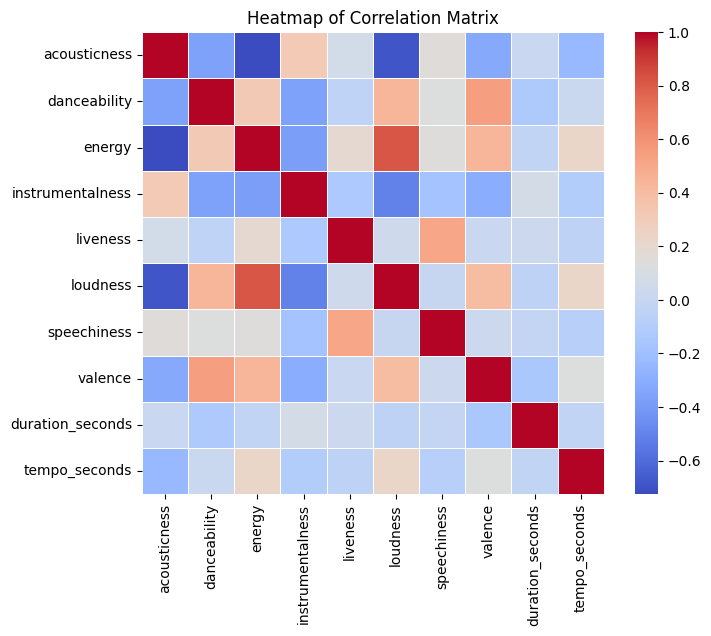

In [205]:
# Calculate the correlation matrix
corr_matrix = data[numeric_data].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [206]:
# Calculate the correlation matrix
corr_matrix = data[numeric_data].corr().abs()

# Create a mask to ignore the upper triangle of the matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than the threshold (0.9)
droped_columns = [column for column in upper.columns if any(upper[column] > 0.8)]

selected_columns = list(set(data.columns) - set(droped_columns))
to_remove = [ "popularity_category"]
selected_columns = [col for col in selected_columns if col not in to_remove]

print('droped_columns: ', droped_columns)
print('selected_columns: ', selected_columns)

droped_columns:  ['loudness']
selected_columns:  ['time_signature', 'energy', 'mode', 'duration_seconds', 'speechiness', 'track_name', 'danceability', 'instrumentalness', 'liveness', 'key', 'acousticness', 'genre', 'valence', 'tempo_seconds', 'artist_name']


In [207]:
# Function to label encode categorical variables
def label_encode_categorical(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df

# Function to train and evaluate models with feature optimization
def recursive_feature_elimination_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Split data into features and target
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the initial model using all features
    model.fit(X_train_scaled, y_train)

    # Predict and calculate metrics
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Use GradientBoostingClassifier if model doesn't support feature importances
    if hasattr(model, 'feature_importances_'):
        importance_model = model
    else:
        print('Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.')
        importance_model = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
        importance_model.fit(X_train_scaled, y_train)

    # Get feature importance
    feature_importances = pd.Series(importance_model.feature_importances_, index=features)
    feature_importances.sort_values(ascending=True, inplace=True)

    # Plot feature importances
    feature_importances.plot.bar(figsize=(20, 6))
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

    # Recursive feature elimination
    features_to_remove = []
    f1_full = f1

    print('Doing recursive feature elimination')
    count = 1

    for feature in feature_importances.index:
        print()
        print(f'Testing feature: {feature} ({count} out of {len(features)})')
        count += 1

        temp_model = type(model)()
        temp_model.fit(X_train.drop(columns=features_to_remove + [feature]), y_train)
        y_pred_temp = temp_model.predict(X_test.drop(columns=features_to_remove + [feature]))
        f1_temp = f1_score(y_test, y_pred_temp, average='macro')

        print(f'New Test F1 Score = {f1_temp}')
        print(f'Full dataset F1 Score = {f1_full}')

        diff_f1 = f1_full - f1_temp

        if diff_f1 >= tol:
            print(f'Drop in F1 Score = {diff_f1}')
            print(f'Keep: {feature}')
        else:
            print(f'Drop in F1 Score = {diff_f1}')
            print(f'Remove: {feature}')
            f1_full = f1_temp
            features_to_remove.append(feature)

    print()
    print('-'*60)
    print(f'Total features to remove: {len(features_to_remove)}')

    features_to_keep = [feature for feature in feature_importances.index if feature not in features_to_remove]
    print(f'Total features to keep: {len(features_to_keep)}')

    # Retrain the model with optimized features
    model.fit(X_train[features_to_keep], y_train)
    y_pred_optimized = model.predict(X_test[features_to_keep])

    # Calculate and print optimized metrics
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    precision_optimized = precision_score(y_test, y_pred_optimized, average='macro')
    recall_optimized = recall_score(y_test, y_pred_optimized, average='macro')
    f1_optimized = f1_score(y_test, y_pred_optimized, average='macro')
    print('-'*60)
    # Print initial metrics
    print(f'Initial Model Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('-'*60)
    # Print optimal metrics
    print(f'Optimized Model Performance:')
    print(f'Accuracy: {accuracy_optimized:.4f}')
    print(f'Precision: {precision_optimized:.4f}')
    print(f'Recall: {recall_optimized:.4f}')
    print(f'F1 Score: {f1_optimized:.4f}')

Evaluating model: DecisionTreeClassifier


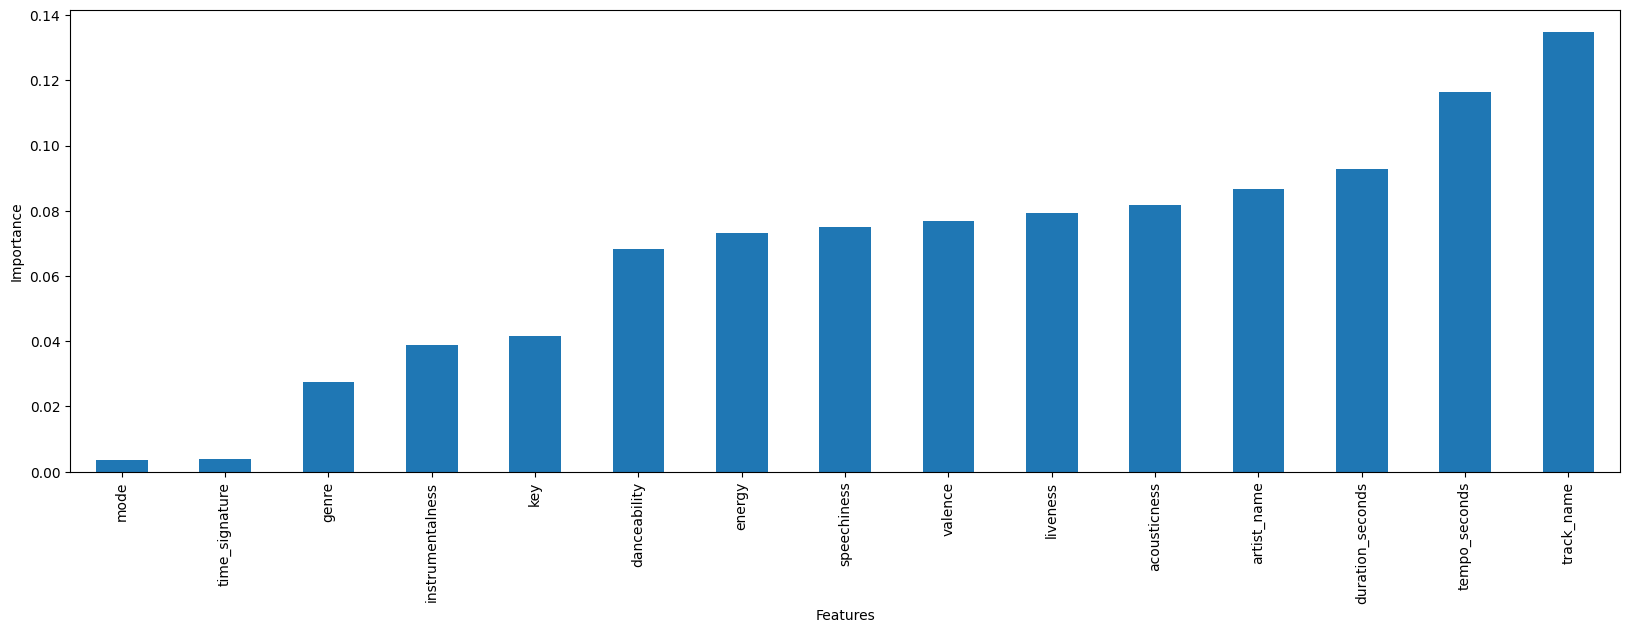

Doing recursive feature elimination

Testing feature: mode (1 out of 15)
New Test F1 Score = 0.5359755860086054
Full dataset F1 Score = 0.5362768823760037
Drop in F1 Score = 0.0003012963673982849
Remove: mode

Testing feature: time_signature (2 out of 15)
New Test F1 Score = 0.533928304531484
Full dataset F1 Score = 0.5359755860086054
Drop in F1 Score = 0.00204728147712141
Keep: time_signature

Testing feature: genre (3 out of 15)
New Test F1 Score = 0.7854415511429701
Full dataset F1 Score = 0.5359755860086054
Drop in F1 Score = -0.2494659651343647
Remove: genre

Testing feature: instrumentalness (4 out of 15)
New Test F1 Score = 0.7942059240194312
Full dataset F1 Score = 0.7854415511429701
Drop in F1 Score = -0.008764372876461146
Remove: instrumentalness

Testing feature: key (5 out of 15)
New Test F1 Score = 0.7915508630746709
Full dataset F1 Score = 0.7942059240194312
Drop in F1 Score = 0.0026550609447603124
Keep: key

Testing feature: danceability (6 out of 15)
New Test F1 Score =

In [208]:
model = DecisionTreeClassifier(random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: GaussianNB
Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.


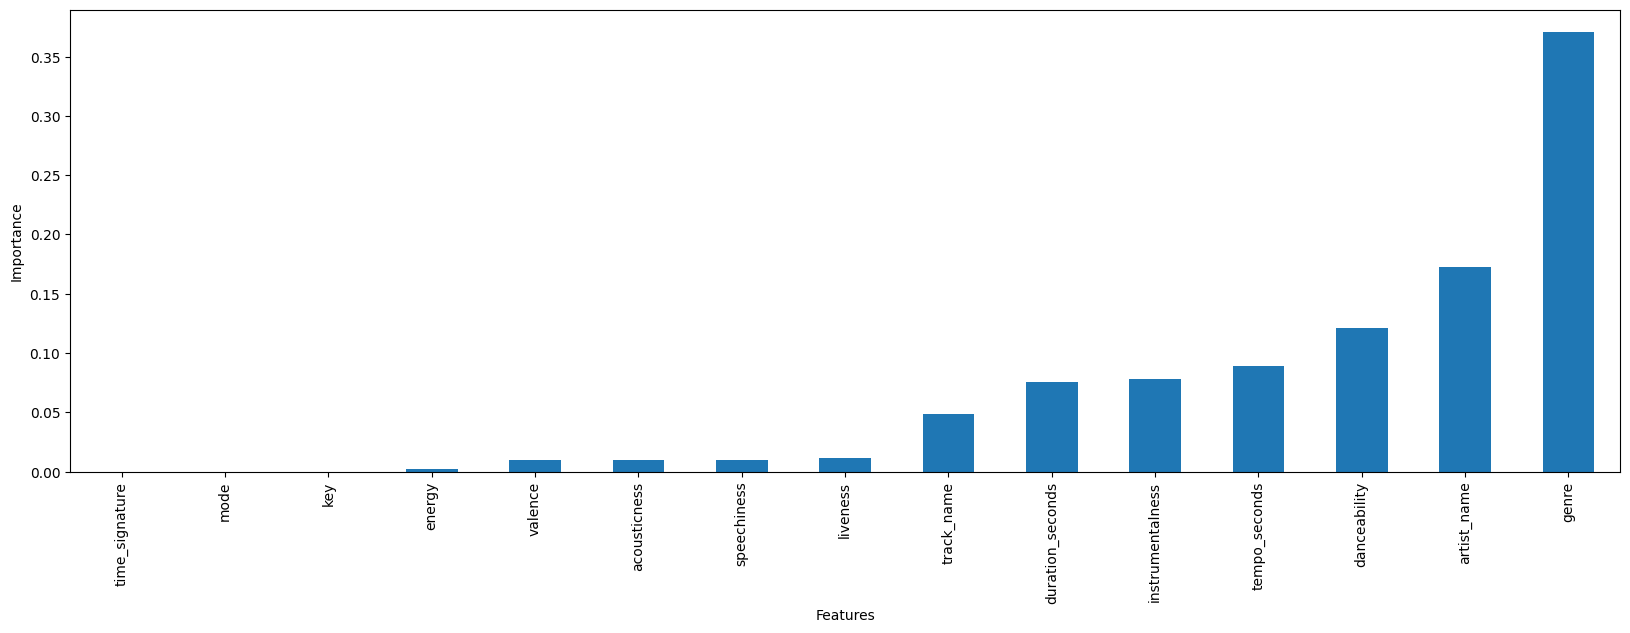

Doing recursive feature elimination

Testing feature: time_signature (1 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.4506040326677137
Drop in F1 Score = -0.048276275104098765
Remove: time_signature

Testing feature: mode (2 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: mode

Testing feature: key (3 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: key

Testing feature: energy (4 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: energy

Testing feature: valence (5 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: valence

Testing feature: acousticness (6 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop 

ValueError: at least one array or dtype is required

In [217]:
model = GaussianNB()

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: LogisticRegression
Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.


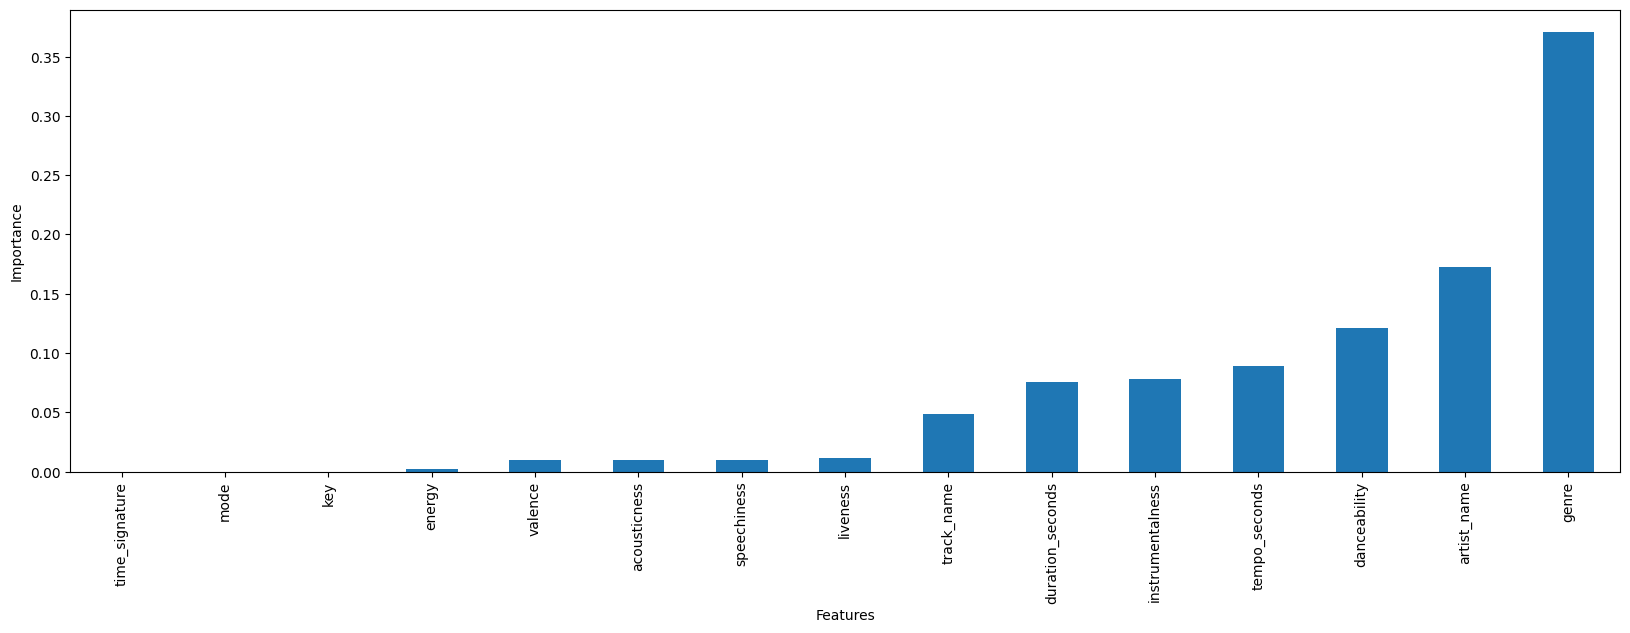

Doing recursive feature elimination

Testing feature: time_signature (1 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: time_signature

Testing feature: mode (2 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: mode

Testing feature: key (3 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: key

Testing feature: energy (4 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: energy

Testing feature: valence (5 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0
Remove: valence

Testing feature: acousticness (6 out of 15)
New Test F1 Score = 0.49888030777181247
Full dataset F1 Score = 0.49888030777181247
Drop in F1 Score = 0.0

ValueError: at least one array or dtype is required

In [218]:
model = LogisticRegression(max_iter=200, random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

In [220]:
# Function to train and evaluate models with feature addition
def recursive_feature_addition_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Split data into features and target
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Start with the first feature
    initial_features = [features[0]]
    model.fit(X_train_scaled[:, [0]], y_train)
    y_pred = model.predict(X_test_scaled[:, [0]])
    f1_full = f1_score(y_test, y_pred, average='macro')

    # Print initial metrics
    print('-'*60)
    print(f'Initial Model Performance with One Feature ({features[0]}):')
    print(f'F1 Score: {f1_full:.4f}')
    print('-'*60)

    # Recursive feature addition
    features_to_add = [features[0]]
    remaining_features = features[1:]

    print('Doing recursive feature addition')

    while remaining_features:
        feature_scores = []

        for feature in remaining_features:
            current_features_indices = [features.index(f) for f in features_to_add + [feature]]

            model.fit(X_train_scaled[:, current_features_indices], y_train)
            y_pred_temp = model.predict(X_test_scaled[:, current_features_indices])
            f1_temp = f1_score(y_test, y_pred_temp, average='macro')

            feature_scores.append((f1_temp, feature))

        feature_scores.sort(reverse=True)
        best_f1, best_feature = feature_scores[0]

        if best_f1 - f1_full >= tol:
            print(f'Adding feature: {best_feature}')
            features_to_add.append(best_feature)
            remaining_features.remove(best_feature)
            f1_full = best_f1
        else:
            print('No more features to add that improve performance by at least the tolerance threshold.')
            break

        print(f'New F1 Score with added feature(s): {f1_full:.4f}')

    print()
    print('-'*60)
    print(f'Total features added: {len(features_to_add)}')
    print(f'Features added: {features_to_add}')

    # Retrain the model with the selected features
    final_features_indices = [features.index(f) for f in features_to_add]
    model.fit(X_train_scaled[:, final_features_indices], y_train)
    y_pred_optimized = model.predict(X_test_scaled[:, final_features_indices])

    # Calculate and print optimized metrics
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    precision_optimized = precision_score(y_test, y_pred_optimized, average='macro')
    recall_optimized = recall_score(y_test, y_pred_optimized, average='macro')
    f1_optimized = f1_score(y_test, y_pred_optimized, average='macro')
    print('-'*60)
    print(f'Optimized Model Performance with Selected Features:')
    print(f'Accuracy:  {accuracy_optimized:.4f}')
    print(f'Precision: {precision_optimized:.4f}')
    print(f'Recall:    {recall_optimized:.4f}')
    print(f'F1 Score:  {f1_optimized:.4f}')
    print('-'*60)

In [222]:
selected_columns

['time_signature',
 'energy',
 'mode',
 'duration_seconds',
 'speechiness',
 'track_name',
 'danceability',
 'instrumentalness',
 'liveness',
 'key',
 'acousticness',
 'genre',
 'valence',
 'tempo_seconds',
 'artist_name']

In [223]:
model = LogisticRegression(max_iter=200, random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: LogisticRegression
------------------------------------------------------------
Initial Model Performance with One Feature (time_signature):
F1 Score: 0.4989
------------------------------------------------------------
Doing recursive feature addition
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------------------
Total features added: 1
Features added: ['time_signature']
------------------------------------------------------------
Optimized Model Performance with Selected Features:
Accuracy:  0.9955
Precision: 0.4978
Recall:    0.5000
F1 Score:  0.4989
------------------------------------------------------------




In [224]:
model = DecisionTreeClassifier(random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: DecisionTreeClassifier
------------------------------------------------------------
Initial Model Performance with One Feature (time_signature):
F1 Score: 0.4989
------------------------------------------------------------
Doing recursive feature addition
Adding feature: track_name
New F1 Score with added feature(s): 0.7570
Adding feature: duration_seconds
New F1 Score with added feature(s): 0.8106
Adding feature: artist_name
New F1 Score with added feature(s): 0.8147
Adding feature: key
New F1 Score with added feature(s): 0.8172
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------------------
Total features added: 5
Features added: ['time_signature', 'track_name', 'duration_seconds', 'artist_name', 'key']
------------------------------------------------------------
Optimized Model Performance with Selected Features:
Accuracy:  0.9966
Precision: 0.8033
Recall:    0.8324
F1 Score:  0.817

In [225]:
model = GaussianNB()

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: GaussianNB
------------------------------------------------------------
Initial Model Performance with One Feature (time_signature):
F1 Score: 0.4989
------------------------------------------------------------
Doing recursive feature addition
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------------------
Total features added: 1
Features added: ['time_signature']
------------------------------------------------------------
Optimized Model Performance with Selected Features:
Accuracy:  0.9955
Precision: 0.4978
Recall:    0.5000
F1 Score:  0.4989
------------------------------------------------------------




In [227]:
from sklearn.feature_selection import SelectFromModel

X = data[selected_columns]
y = data['popularity_category']
feature_names = selected_columns

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Classification with all features
clf_all_features = LogisticRegression(max_iter=1000, random_state=42)
clf_all_features.fit(X_train, y_train)
y_pred_all = clf_all_features.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all features: {accuracy_all:.4f}')
print('-'*60)
# 2. Feature selection using L1 regularization (Lasso)
clf_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
clf_l1.fit(X_train, y_train)

# Select features
model_l1 = SelectFromModel(clf_l1, prefit=True)
X_train_l1 = model_l1.transform(X_train)
X_test_l1 = model_l1.transform(X_test)
selected_features_l1 = model_l1.get_support(indices=True)
print(f'Selected {len(selected_features_l1)} features by L1: {np.array(feature_names)[selected_features_l1]}')

# Classification with L1 selected features
clf_l1_selected = LogisticRegression(max_iter=1000, random_state=42)
clf_l1_selected.fit(X_train_l1, y_train)
y_pred_l1 = clf_l1_selected.predict(X_test_l1)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'Accuracy with L1 selected features: {accuracy_l1:.4f}')
print('-'*60)

# 3. Feature selection using L2 regularization (Ridge)
clf_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
clf_l2.fit(X_train, y_train)

# Select features
model_l2 = SelectFromModel(clf_l2, prefit=True)
X_train_l2 = model_l2.transform(X_train)
X_test_l2 = model_l2.transform(X_test)
selected_features_l2 = model_l2.get_support(indices=True)
print(f'Selected {len(selected_features_l2)} features by L2: {np.array(feature_names)[selected_features_l2]}')

# Classification with L2 selected features
clf_l2_selected = LogisticRegression(max_iter=1000, random_state=42)
clf_l2_selected.fit(X_train_l2, y_train)
y_pred_l2 = clf_l2_selected.predict(X_test_l2)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'Accuracy with L2 selected features: {accuracy_l2:.4f}')

Accuracy with all features: 0.9955
------------------------------------------------------------
Selected 14 features by L1: ['time_signature' 'energy' 'mode' 'duration_seconds' 'speechiness'
 'danceability' 'instrumentalness' 'liveness' 'key' 'acousticness' 'genre'
 'valence' 'tempo_seconds' 'artist_name']
Accuracy with L1 selected features: 0.9955
------------------------------------------------------------
Selected 5 features by L2: ['time_signature' 'key' 'acousticness' 'genre' 'tempo_seconds']
Accuracy with L2 selected features: 0.9955
